In [1]:
# -*- coding:utf-8 -*- #

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tushare as ts
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime

# 數據準備
base = ts.get_hist_data('000002')
df = pd.DataFrame()
df['y'] = base['volume']
df['ds'] = base.index

# 日期插補
ds = df['ds'].min()
arr = []
while ds < df['ds'].max():
    ds = str(pd.to_datetime(ds) + datetime.timedelta(days=1))[:10]
    if ds not in np.array(df['ds']):
        arr.append({'ds':ds, 'y':0}) # 以字典方式加入數組
tmp = pd.DataFrame(arr)
df = pd.concat([tmp, df])
df = df.reset_index(drop=True)
df = df.sort_values(['ds'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


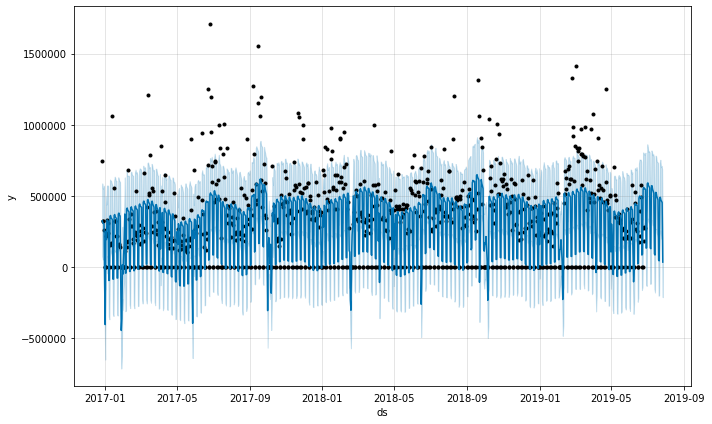

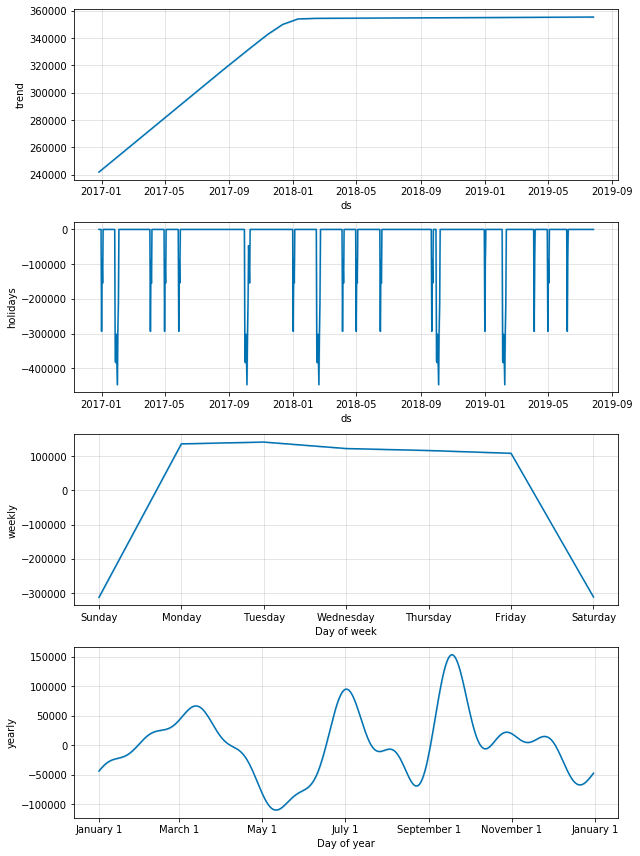

In [3]:
holidays = pd.read_csv('holiday.csv')

prophet = Prophet(holidays=holidays) 
prophet.fit(df)  
future = prophet.make_future_dataframe(freq='D',periods=30)  # 測試之後三十天
forecasts = prophet.predict(future)  

prophet.plot(forecasts).show() 
prophet.plot_components(forecasts).show() 
plt.show()